Project 3
Naomi and Vienna

In [2]:
%matplotlib notebook

from modsim import *

In [3]:
kg = UNITS.kilogram
m = UNITS.meter
s = UNITS.second
N = UNITS.newton
degree = UNITS.degree

In [4]:
#mass of person
mass = 62.1422 * kg

In [5]:
#constants
g = 9.81 * m/s**2
k_trampoline = 200 * kg/s**2

In [6]:
#starting conditions
h_init = 3 * m
v_init = 0 * m/s

In [7]:
init = State(y = 3 * m,
             v = 0 * m/s)

In [8]:
duration = 0.6726445156717903

In [9]:
ts = linrange(0, duration, 1)

In [10]:
system = System(init=init, g=g, ts=ts)

In [11]:
def slope_func(state, t, system):
    y, v = state
    unpack(system)
    dydt = v
    dvdt = -g
    
    return dydt, dvdt

In [12]:
slope_func(init, 0, system)

(<Quantity(0.0, 'meter / second')>, <Quantity(-9.81, 'meter / second ** 2')>)

In [13]:
run_odeint(system, slope_func)

In [14]:
def plot_position(results):
    """Plot the results.
    
    results: DataFrame with position, `y`
    """
    newfig()
    plot(results.y, label='y')
        
    decorate(xlabel='Time (s)',
             ylabel='Position (m)')

<IPython.core.display.Javascript object>


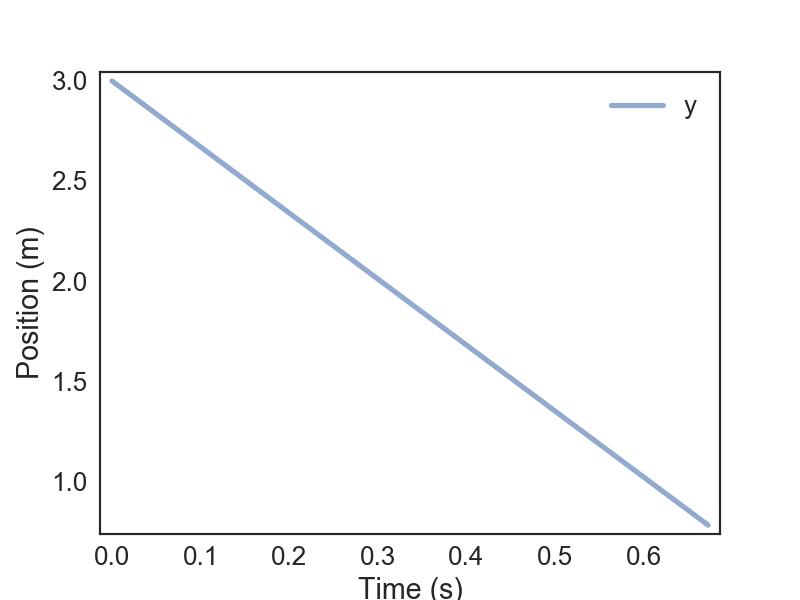

In [15]:
plot_position(system.results)

In [16]:
y = system.results.y

In [17]:
type(y)

pandas.core.series.Series

In [17]:
Y = interpolate(y)

In [18]:
T = interp_inverse(y, kind='cubic')

In [19]:
T_tramp = T(0)

In [20]:
T_tramp #time that it takes to hit the trampoline

array(0.6726445156717903)

In [21]:
'''condition = Condition(g = 9.8 * m/s**2,
                      mass = 62.1422 * kg,
                      k_trampoline = 200 * kg/s**2,
                      v_init = 0 * m/s,
                      angle = 270 * degree,
                      duration = 100 * s)'''

'condition = Condition(g = 9.8 * m/s**2,\n                      mass = 62.1422 * kg,\n                      k_trampoline = 200 * kg/s**2,\n                      v_init = 0 * m/s,\n                      angle = 270 * degree,\n                      duration = 100 * s)'

In [22]:
'''def make_system(condition):
    unpack(condition)
    theta = np.deg2rad(angle)
    vx, vy = pol2cart(theta, v_init)
    init = State(vx=vx, vy=vy)
    ts = linspace(0, duration, 101)
    return System(init=init, g=g, mass=mass, ts=ts, k_trampoline=k_trampoline)'''

'def make_system(condition):\n    unpack(condition)\n    theta = np.deg2rad(angle)\n    vx, vy = pol2cart(theta, v_init)\n    init = State(vx=vx, vy=vy)\n    ts = linspace(0, duration, 101)\n    return System(init=init, g=g, mass=mass, ts=ts, k_trampoline=k_trampoline)'

In [23]:
'''system = make_system(condition)
system'''

'system = make_system(condition)\nsystem'

In [24]:
'''def slope_func(state, t, system):
    vx, vy = state
    unpack(system)
    a_grav= Vector(0, -g)
    v = Vector(vx, vy)'''
    
    

'def slope_func(state, t, system):\n    vx, vy = state\n    unpack(system)\n    a_grav= Vector(0, -g)\n    v = Vector(vx, vy)'

In [25]:
#essential equations
"""
v_final_down = sqrt(2*g*d) #vertical velocity right before contact with trampoline
t = sqrt(2*d/g) #time to reach trampoline
p = mass * v_final_down #momentum at bottom
force_down = p/t #force applied to trampoline
tramp_displace = force_down / k_trampoline #trampoline displacement
tramp_PE = 0.5 * k_trampoline * tramp_displace**2 #elastic potential energy of trampoline


height_final = tramp_PE / (mass*g) #final height of person

v_initial_up = v_final_down
h_final = (v_initial_up**2)/(2*g)"""

'\nv_final_down = sqrt(2*g*d) #vertical velocity right before contact with trampoline\nt = sqrt(2*d/g) #time to reach trampoline\np = mass * v_final_down #momentum at bottom\nforce_down = p/t #force applied to trampoline\ntramp_displace = force_down / k_trampoline #trampoline displacement\ntramp_PE = 0.5 * k_trampoline * tramp_displace**2 #elastic potential energy of trampoline\n\n\nheight_final = tramp_PE / (mass*g) #final height of person\n\nv_initial_up = v_final_down\nh_final = (v_initial_up**2)/(2*g)'

In [26]:
def trampoline_something (mass, d, g=g, k=k_trampoline):
    v_final_down = sqrt(2*g*d) #vertical velocity right before contact with trampoline
    t = sqrt(2*d/g) #time to reach trampoline
    p = mass * v_final_down #momentum at bottom
    force_down = p/t #force applied to trampoline
    tramp_displace = force_down / k_trampoline #trampoline displacement
    tramp_PE = 0.5 * k_trampoline * tramp_displace**2 #elastic potential energy of trampoline
    return tramp_PE

In [27]:
tramp_PE = trampoline_something (mass, h_init, g, k_trampoline)

In [28]:
def final_height (tramp_PE, mass, g):
    height_final = tramp_PE / (mass*g)
    return height_final

In [29]:
final_height (tramp_PE, mass, g) #height without legs

<Quantity(1.5240374549999993, 'meter')>

In [30]:
run_odeint(system, final_height)

Before running scipy.integrate.odeint, I tried
                 running the slope function you provided with the
                 initial conditions in system and t=0, and I got
                 the following error:


ZeroDivisionError: float division by zero

<IPython.core.display.Javascript object>


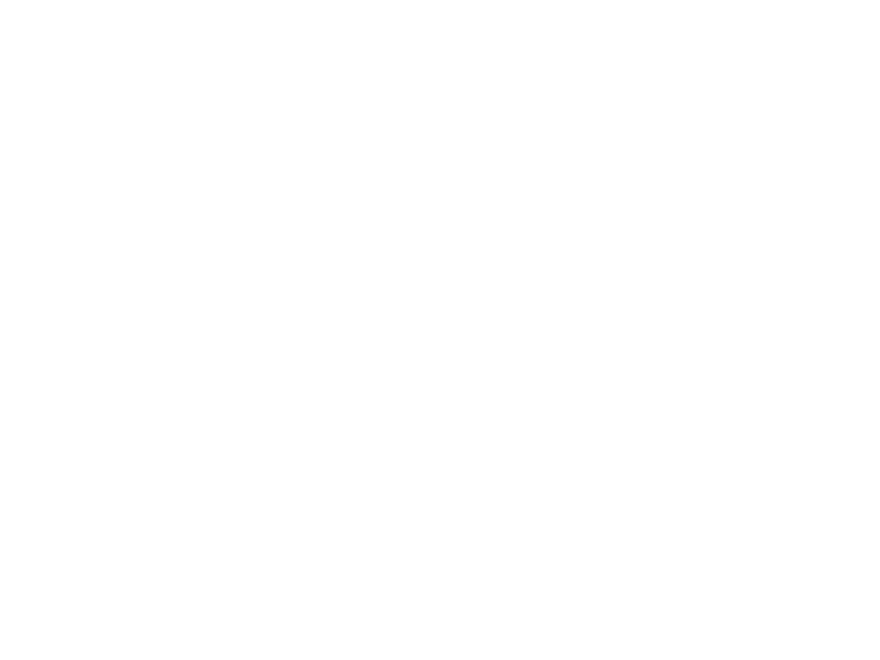

RuntimeError: xdata and ydata must be the same length

In [31]:
newfig()
plot(system.results, label = "final height")